# Network X - Fundamentals

NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

This notebook serves as a brief introduction to the NetworkX package. It covers the following topics:

- Creating a graph.
- Graph elements: nodes and edges.
- Graph visualization.
- Basic graph properties: number of nodes and edges, degree, path length.

This tutorial is based on "A First Course in Network Science" by Filippo Menczer. [You can see their official Github repository here.](https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/tree/master). Please take a look at the folder [references/networkx_indiana](../../references/networkx_indiana/) for more information.


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

---


## Undirected Graphs


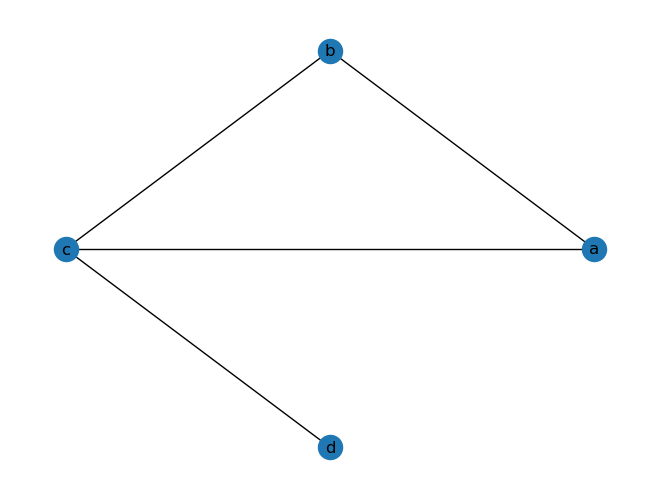

In [158]:
# Initialize an empty (undirected) graph
G = nx.Graph()

# Give each a node a 'name', which is a letter in this case.
G.add_node("a")

# The add_nodes_from method allows adding nodes from a sequence, in this case a list
nodes_to_add = ["b", "c", "d"]
G.add_nodes_from(nodes_to_add)

# Add edge from 'a' to 'b'
# Since this graph is undirected, the order doesn't matter here
G.add_edge("a", "b")

# Just like add_nodes_from, we can add edges from a sequence
# Edges should be specified as 2-tuples
edges_to_add = [("a", "c"), ("b", "c"), ("c", "d")]
G.add_edges_from(edges_to_add)

# Draw the graph
pos = nx.circular_layout(G)
nx.draw(G, with_labels=True, pos=pos)
plt.show()

In [159]:
# Print basic information about the graph
print(G)

# List all nodes
print("Nodes:", G.nodes())

# List all edges
print("Edges:", G.edges())

Graph with 4 nodes and 4 edges
Nodes: ['a', 'b', 'c', 'd']
Edges: [('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')]


### Degrees


We can see the properties of a specific node.

**Degree**: The degree of a node $k$ is the number of edges connected to it.


In [160]:
# Degree of a node
print("Degree of 'a':", G.degree("a"))

Degree of 'a': 2


The average degree of a graph is given by:

$$\langle k \rangle = \frac{2E}{N}$$

where $E$ is the number of edges and $N$ is the number of nodes.


In [161]:
# Average degree of the graph
ls_degrees = [G.degree(node) for node in G.nodes()]
avg_degree = sum(ls_degrees) / len(ls_degrees)
print("Average degree:", avg_degree)

Average degree: 2.0


### Density


A graph **density** is the ratio of the number of edges to the number of possible edges. It is a measure of how many edges are present in the graph compared to the maximum possible number of edges. The density of a graph can be calculated as follows:

$$
D = \frac{2|E|}{|V|(|V| - 1)}
$$

where $|E|$ is the number of edges and $|V|$ is the number of nodes in the graph.


In [162]:
# Density
print("Density:", nx.density(G))

Density: 0.6666666666666666


A graph is **sparse** when $D << 1$ and **dense** when $D \approx 1$.


---


## Directed Graphs


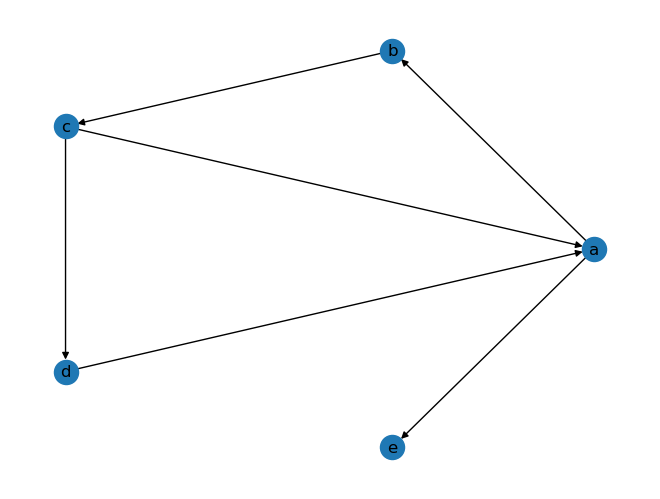

In [163]:
# Initialize a directed graph
D = nx.DiGraph()

# Add edges. The order of the tuple matters here because this is a directed graph
# If a node is not already in the graph, it will be added automatically
D.add_edges_from(
    [("a", "b"), ("b", "c"), ("c", "d"), ("d", "a"), ("a", "e"), ("c", "a")]
)

# Draw the graph
pos = nx.circular_layout(D)
nx.draw(D, with_labels=True, pos=pos)
plt.show()

We can see the same properties of the undirected graph in the directed graph. However, the directed graph has a direction in the edges.


In [164]:
# Print basic information about the graph
print(D)

# List all nodes
print("Nodes:", D.nodes())

# List all edges
print("Edges:", D.edges())

DiGraph with 5 nodes and 6 edges
Nodes: ['a', 'b', 'c', 'd', 'e']
Edges: [('a', 'b'), ('a', 'e'), ('b', 'c'), ('c', 'd'), ('c', 'a'), ('d', 'a')]


### Degrees in Directed Graphs


Same with a node. It has an in-degree and an out-degree.


In [165]:
print("In-degree of 'a':", D.in_degree("a"))
print("Out-degree of 'a':", D.out_degree("a"))

In-degree of 'a': 2
Out-degree of 'a': 2


### Density of Directed Graphs


The formula for the density of a directed graph is the same as the formula for the density of an undirected graph, but in this case there are two times more possible edges. The density of a directed graph can be calculated as follows:

$$
D = \frac{|E|}{|V|(|V| - 1)}
$$

where $|E|$ is the number of edges and $|V|$ is the number of nodes in the graph.


In [166]:
# Density of a directed graph
print("Density:", nx.density(D))

Density: 0.3


---


## Paths in a Graph


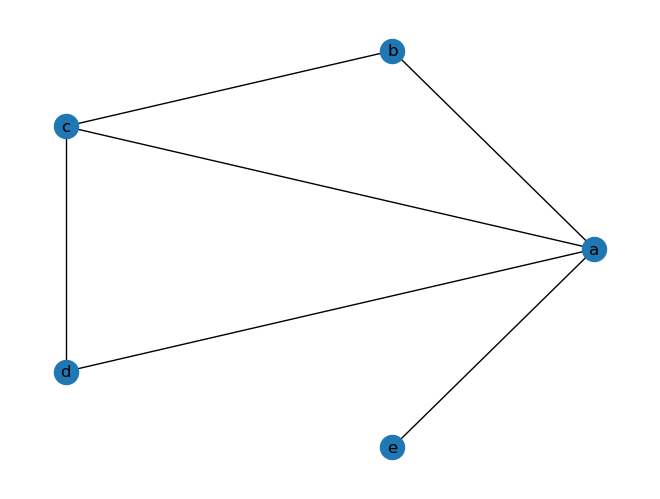

In [167]:
# Initialize an undirected graph
G = nx.Graph()

# Add edges
G.add_edges_from(
    [("a", "b"), ("b", "c"), ("c", "d"), ("d", "a"), ("a", "e"), ("c", "a")]
)

# Draw the graph
pos = nx.circular_layout(G)
nx.draw(G, with_labels=True, pos=pos)
plt.show()

A **path** in a network is a sequence of edges connecting two nodes.


In [168]:
print(nx.has_path(G, "c", "e"))
print(nx.shortest_path(G, "c", "e"))
# The second command will raise an error if the graph is not connected

True
['c', 'a', 'e']


There can be more than one path between two nodes.


In [169]:
list(nx.all_simple_paths(G, "c", "e"))
# This command will raise an error if the graph is not connected

[['c', 'b', 'a', 'e'], ['c', 'd', 'a', 'e'], ['c', 'a', 'e']]

The **diameter** of a graph is the longest shortest path between any two nodes.


In [170]:
print("Diameter:", nx.diameter(G))

Diameter: 2


The **average path length (APL)** is the average of the shortest paths between all pairs of nodes.


In [171]:
print("Average shortest path length:", nx.average_shortest_path_length(G))

Average shortest path length: 1.4


### Paths in a Directed Graph


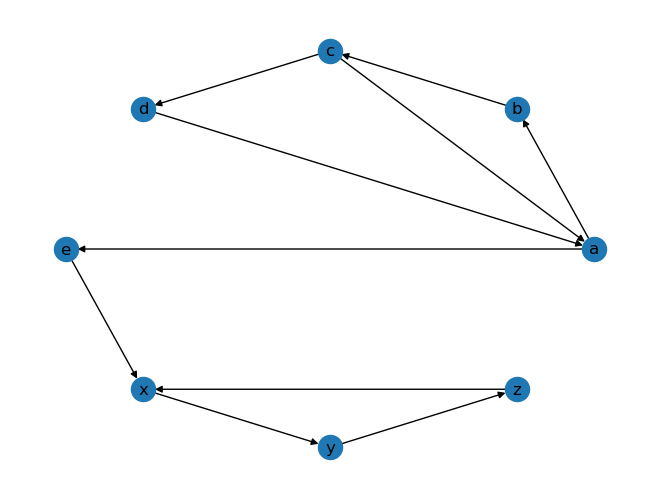

In [172]:
# Initialize a directed graph
D = nx.DiGraph()

# Add edges
D.add_edges_from(
    [
        ("a", "b"),
        ("b", "c"),
        ("c", "d"),
        ("d", "a"),
        ("a", "e"),
        ("c", "a"),
        ("x", "y"),
        ("y", "z"),
        ("z", "x"),
        ("e", "x"),
    ]
)

# Draw the graph
pos = nx.circular_layout(D)
nx.draw(D, with_labels=True, pos=pos)
plt.show()

In [173]:
# Can we reach 'c' from 'z'?
nx.has_path(D, "c", "z")

True

In [174]:
# Can we reach 'z' from 'c'?
nx.has_path(D, "z", "c")

False

**Exercise.** Create a path from "z" to "c" in the directed graph `D`, so that the shortest path has a length of 4.


### Connectivity


A graph is **connected** when we can reach any node from any other node by following the edges. This means, there exists a path between any two nodes.


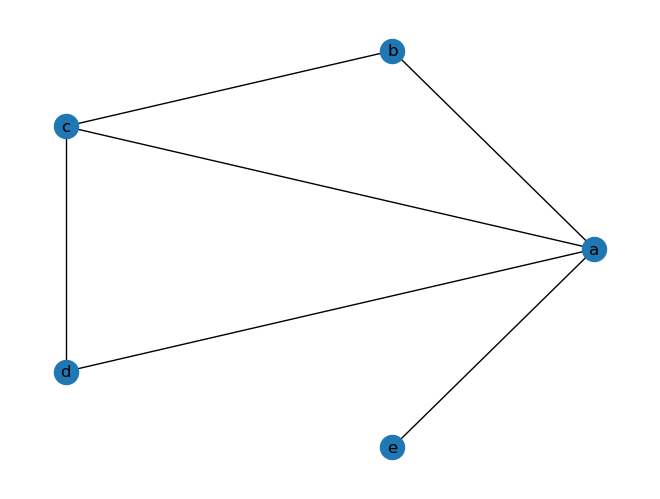

Is connected: True


In [175]:
# Initialize an undirected graph
G = nx.Graph()

# Add edges
G.add_edges_from(
    [("a", "b"), ("b", "c"), ("c", "d"), ("d", "a"), ("a", "e"), ("c", "a")]
)

# Draw the graph
pos = nx.circular_layout(G)
nx.draw(G, with_labels=True, pos=pos)
plt.show()

print("Is connected:", nx.is_connected(G))

Is connected: False


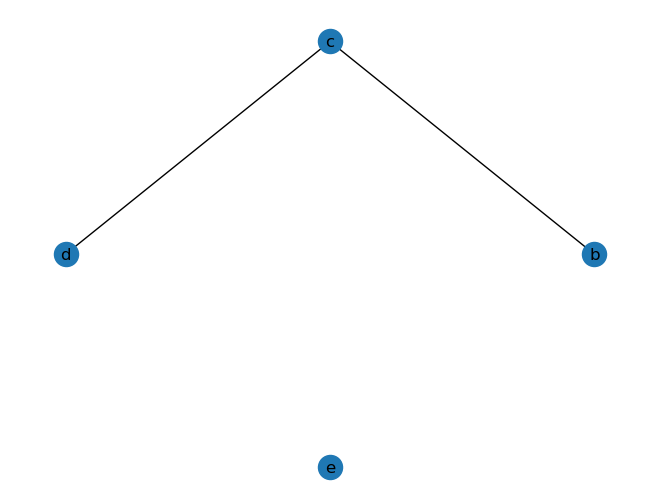

In [176]:
# Remove a node
if "a" in G.nodes():
    G.remove_node("a")

# Is connected now?
print("Is connected:", nx.is_connected(G))

# Draw the graph
pos = nx.circular_layout(G)
nx.draw(G, with_labels=True, pos=pos)
plt.show()

### Connectivity of Directed Graphs


The **connectivity** of a directed graph is defined by the **strongly connected components**. A directed graph is **strongly connected** if there is a directed path from any node to any other node. Conversely, a directed graph is **weakly connected** if there is an undirected path from any node to any other node.


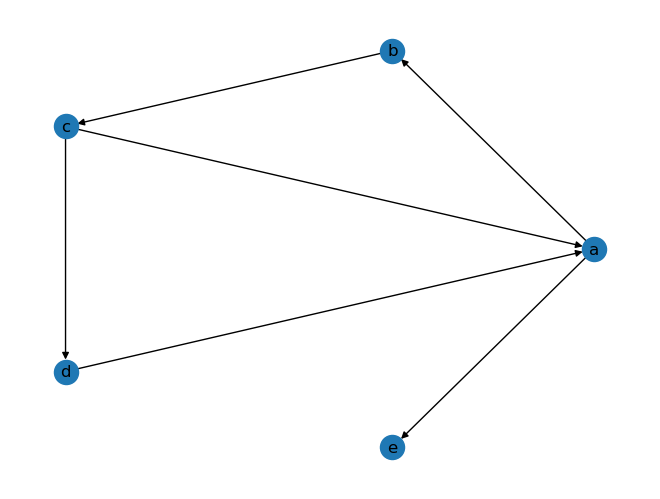

Is strongly connected: False
Is weakly connected: True


In [177]:
# Initialize a directed graph
D = nx.DiGraph()

# Add edges. The order of the tuple matters here because this is a directed graph
# If a node is not already in the graph, it will be added automatically
D.add_edges_from(
    [("a", "b"), ("b", "c"), ("c", "d"), ("d", "a"), ("a", "e"), ("c", "a")]
)

# Draw the graph
pos = nx.circular_layout(D)
nx.draw(D, with_labels=True, pos=pos)
plt.show()

print("Is strongly connected:", nx.is_strongly_connected(D))
print("Is weakly connected:", nx.is_weakly_connected(D))

**Exercise.** Make a copy of graph `D` and name it `D_strong`. Turn it into a strongly connected graph.


**Exercise.** Make a copy of graph `D` and name it `D_uncon`. Turn it into a unconnected graph.


### Connected Components


A **connected component** is a connected subnetwork.

The largest one is called giant component; it often includes a substantial portion of the network.

A singleton is the smallest-possible connected component.


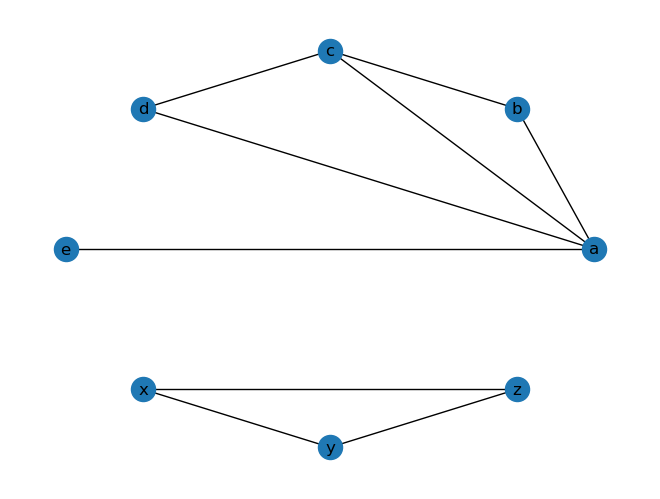

In [178]:
# Initialize an undirected graph
G = nx.Graph()

# Add edges
G.add_edges_from(
    [
        ("a", "b"),
        ("b", "c"),
        ("c", "d"),
        ("d", "a"),
        ("a", "e"),
        ("c", "a"),
        ("x", "y"),
        ("y", "z"),
        ("z", "x"),
    ]
)

# Draw the graph
pos = nx.circular_layout(G)
nx.draw(G, with_labels=True, pos=pos)
plt.show()

The `nx.connected_components()` function takes a graph and returns a list of sets of node names, one such set for each connected component. Verify that the two sets in the following list correspond to the two connected components in the drawing of the graph above:


In [179]:
list(nx.connected_components(G))

[{'a', 'b', 'c', 'd', 'e'}, {'x', 'y', 'z'}]

**Exercise.** How many connected components are there in the graph `G` below?


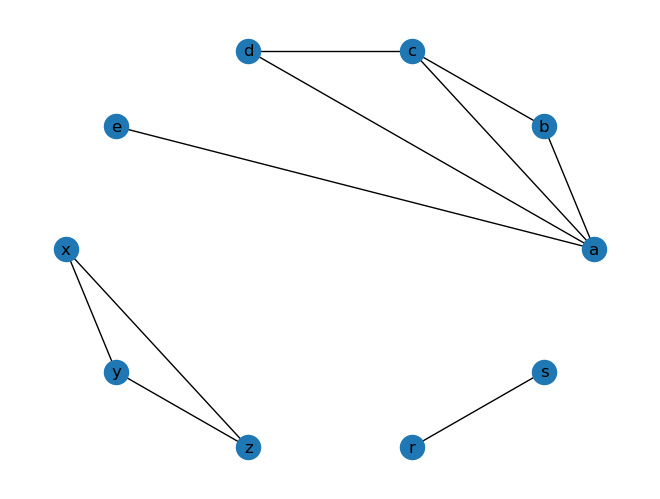

In [180]:
list_edges = [("x", "y"), ("y", "z"), ("z", "x"), ("r", "s")]

G.add_edges_from(list_edges)

pos = nx.circular_layout(G)
nx.draw(G, with_labels=True, pos=pos)
plt.show()

### Connected Components in Directed Graphs


In a directed graph, we can have **strongly connected components** and **weakly connected components**.


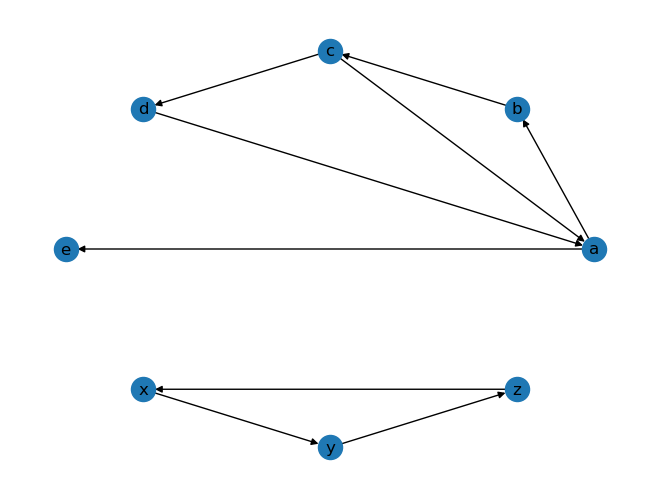

In [181]:
# Initialize a directed graph
D = nx.DiGraph()

# Add edges
D.add_edges_from(
    [
        ("a", "b"),
        ("b", "c"),
        ("c", "d"),
        ("d", "a"),
        ("a", "e"),
        ("c", "a"),
        ("x", "y"),
        ("y", "z"),
        ("z", "x"),
    ]
)

# Draw the graph
pos = nx.circular_layout(D)
nx.draw(D, with_labels=True, pos=pos)
plt.show()

A directed graph is **strongly connected** if there is a directed path from any node to any other node.


In [182]:
print("Is strongly connected:", nx.is_strongly_connected(D))
print(list(nx.strongly_connected_components(D)))

Is strongly connected: False
[{'e'}, {'d', 'b', 'a', 'c'}, {'x', 'z', 'y'}]


A directed graph is **weakly connected** if there is an undirected path from any node to any other node.


In [183]:
print("Is weakly connected:", nx.is_weakly_connected(D))
print(list(nx.weakly_connected_components(D)))

Is weakly connected: False
[{'e', 'a', 'd', 'b', 'c'}, {'x', 'z', 'y'}]


---


## Weighted Edges


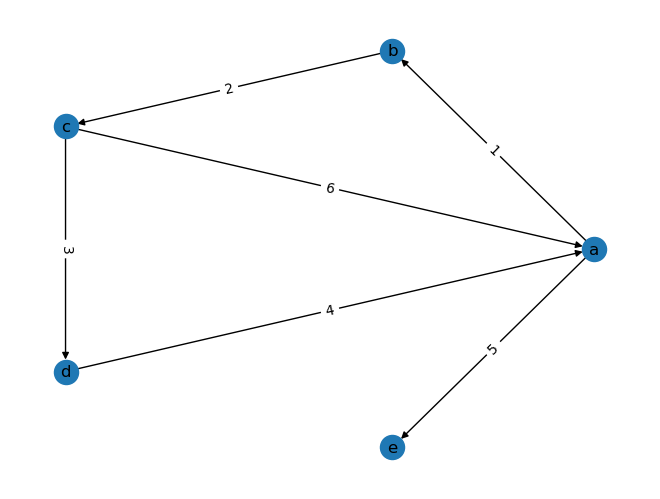

In [184]:
# Initialize a directed graph
D = nx.DiGraph()

# Add weighted edges
D.add_weighted_edges_from(
    [
        ("a", "b", 1),
        ("b", "c", 2),
        ("c", "d", 3),
        ("d", "a", 4),
        ("a", "e", 5),
        ("c", "a", 6),
    ]
)

# Choose a layout (required to add the weights)
pos = nx.circular_layout(D)
# Draw the graph
nx.draw(D, with_labels=True, pos=pos)
# Draw the edge labels
edge_labels = nx.get_edge_attributes(D, "weight")
nx.draw_networkx_edge_labels(D, pos=pos, edge_labels=edge_labels)
plt.show()
plt.close()

---


## Exercise: OpenFlights Network


This repository contains several example network datasets. Among these is a network of US air travel routes:


Graph with 546 nodes and 2781 edges
Nodes: ['RDD', 'EUG', 'IDA', 'MFR', 'RDM', 'OOK', 'ABL', 'BKC', 'ITO', 'OBU', 'ORV', 'WLK', 'KTS', 'CAK', 'HSV', 'PKB', 'MGM', 'TRI', 'PAH', 'KKA', 'SMK', 'SKK', 'TNC', 'AKB', 'PGA', 'FCA', 'MBS', 'BGM', 'KFP', 'NLG', 'KLW', 'KWN', 'HNM', 'KYU', 'SCM', 'BTI', 'NME', 'KKH', 'NIB', 'PSG', 'AIN', 'CIC', 'KUK', 'WNA', 'IRC', 'SFB', 'SLQ', 'JST', 'HKB', 'MLY', 'CLM', 'KWT', 'ELI', 'GLV', 'PSM', 'TLA', 'WAA', 'MSO', 'HVR', 'HHH', 'GRK', 'TVF', 'SGY', 'MLL', 'RBY', 'EGE', 'CSG', 'LAW', 'FLG', 'ANV', 'TWF', 'MVY', 'KVC', 'STC', 'GTR', 'ERI', 'HYA', 'PTH', 'AUK', 'MGW', 'CRW', 'AVP', 'BJI', 'FAR', 'KPN', 'GCC', 'SVA', 'SCE', 'HGR', 'KOT', 'MEI', 'SPI', 'CEZ', 'HDN', 'LBL', 'COD', 'SGF', 'JLN', 'ABE', 'XNA', 'SBN', 'CKB', 'LRD', 'ORH', 'ACV', 'OAJ', 'DBQ', 'GGG', 'PVC', 'KTN', 'GGW', 'OGD', 'PIH', 'PDT', 'LUR', 'PIZ', 'RAP', 'BTT', 'FYU', 'ATK', 'TLJ', 'SNP', 'IGG', 'STG', 'ILI', 'PTU', 'AZA', 'FSM', 'KAL', 'GFK', 'KSM', 'PRC', 'TTN', 'BOS', 'KVL', 'OAK', 'OMA

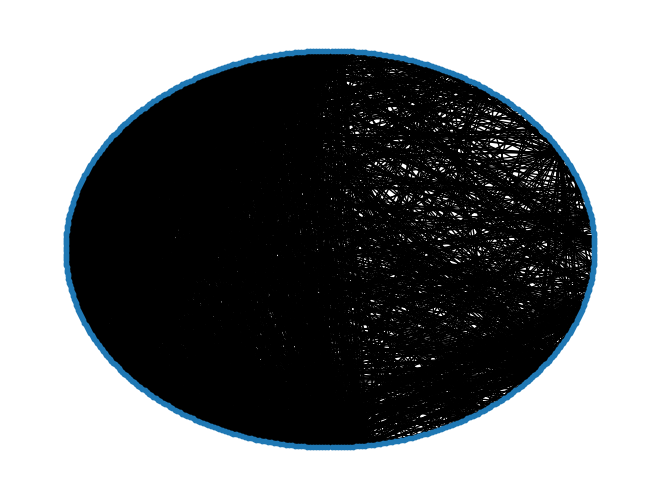

In [185]:
G = nx.read_graphml("../../data/openflights/openflights_usa.graphml.gz")

print(G)
print("Nodes:", G.nodes())

pos = nx.circular_layout(G)
nx.draw(G, pos=pos, node_size=10)
plt.show()

The nodes in this graph are airports, represented by their [IATA codes](https://en.wikipedia.org/wiki/List_of_airports_by_IATA_code:_A); two nodes are connected with an edge if there is a scheduled flight directly connecting these two airports. We'll assume this graph to be undirected since a flight in one direction usually means there is a return flight.

Thus this graph has edges

```
[('HOM', 'ANC'), ('BGM', 'PHL'), ('BGM', 'IAD'), ...]
```

where ANC is Anchorage, IAD is Washington Dulles, etc.

These nodes also have **attributes** associated with them, containing additional information about the airports, in the form of a dictionary:


In [186]:
G.nodes["IND"]

{'name': 'Indianapolis International Airport',
 'latitude': 39.7173,
 'longitude': -86.294403,
 'IATA': 'IND'}

**Exercise.** Is there a direct flight between Indianapolis and Fairbanks, Alaska (FAI)? A direct flight is one with no intermediate stops.


**Exercise.** If I wanted to fly from Indianapolis (IND) to Fairbanks, Alaska (FAI) what would be an itinerary with the fewest number of flights?


**Exercise.** Is it possible to travel from any airport in the US to any other airport in the US, possibly using connecting flights? In other words, does there exist a path in the network between every possible pair of airports (is the graph connected)?


**Exercise.** Which airports are the most important for connectivity?


**Exercise.** What happens if a major hub is removed?


---


# Next Steps...


Now you understand the basics of NetworkX. You can use this knowledge to analyze and visualize networks. You can also use this knowledge to create your own networks and analyze them.

Your next step is to open the notebook "structural properties" and learn new concepts such as clustering coefficient, centrality, and robustness.


---
